# Example of bisection method to determine critical mass to injury of bungee jumper problem

In this code, we show an example of the implementation of the bisection method, and we apply it to the bungee jumper problem to find the largest mass the jumper can have so that the jumper does not exceed the critical velocity that would cause injury.

## Bisection function

First, let's implement the bisection method:

In [10]:
     """
    Function to find zeros (roots) of a scalar function f

    Parameters
    ----------


    f : function. The function whose zeros we want to find.


    a : float. Lower bound of search interval.


    b : float. Upper bound of search interval.


    lmax : float. Largest size of interval.


    itmax: int. Maximum number of iterations


    verbose : bool. Optional keyword argument. If true, print iteration-to-iteration info to screen.


    Returns
    -------


    root, number of iterations

    """
function bisection(
    f::Function,
    a::Float64,
    b::Float64,
    lmax::Float64,
    itmax::Int;
    verbose::Bool=false 
)::Tuple{Float64, Int}

    # --- Sanity checks ---
    @assert a <= b 
    @assert lmax > 0 
    @assert itmax > 0 
    @assert f(a)*f(b) < 0 "f(a) and f(b) must have opposite signs."


    # --- Initialization ---
    iter = 0
    xl = a
    xu = b
    xmid = (xu + xl) / 2

    # --- Bisection loop ---
    while abs(xu - xl) > lmax && iter < itmax
        xmid = (xu + xl) / 2
        if f(xl) * f(xmid) < 0
            xu = xmid
        else
            xl = xmid
        end
        if verbose
            println("It. $iter: xl = $xl, xu = $xu, xmid = $xmid")
        end 
        iter += 1
    end

    return xmid, iter
end


bisection

Note that the *docstring* (i.e., the string in between three-quotes before the definition of the function) describes the function, and it is what is printed if you ask for help with this function:

In [6]:
?bisection

search: bisection function position Function Exception @cfunction



Function to find zeros (roots) of a scalar function f

## Parameters

f : function. The function whose zeros we want to find.

a : float. Lower bound of search interval.

b : float. Upper bound of search interval.

lmax : float. Largest size of interval.

itmax: int. Maximum number of iterations

verbose : bool. Optional keyword argument. If true, print iteration-to-iteration info to screen.

## Returns

root, number of iterations


## Bungee jumper problem

Now, let's recall the implicit function $f(m)$ for our problem, which is zero when the mass $m$ of the jumper (in kg) is such that the velocity will exceed the velocity that will cause injury. The function is given by
\begin{align}
f(m) = \sqrt\frac{mg}{c_d}  \tanh \left( \sqrt{\frac{c_d g}{m}} t_{inj} \right) - v_{inj}
\end{align}

The constants for this problem are:

In [7]:
cd = 0.25; # drag coefficient in kg/m
g = 9.81; # gravitational acceleration in m/s^2
v_inj = 36.; # speed of injury in m/s_loc
t_inj = 4.; # time to injury in s at v_inj

And we define the function in Julia:

In [8]:
f(m) = sqrt((m * g) / cd) * tanh(sqrt((cd * g) / m) * t_inj) - v_inj

f (generic function with 1 method)

We will now use our `bisection` function to find the root (e.g., zero) of $f$. We will perform the bisection in the interval $m \in [50,200]$ kg, specify the width of the smallest search interval to be 1 kg, and impose a (safety) limit of 1000 iterations. We will also set the keyword argument `verbose=true` so that the `bisection` function writes out the search interval at each iteration:

In [11]:
msol, iter = bisection(f, 50., 200., 1., 1000, verbose=true)

It. 0: xl = 125.0, xu = 200.0, xmid = 125.0
It. 1: xl = 125.0, xu = 162.5, xmid = 162.5
It. 2: xl = 125.0, xu = 143.75, xmid = 143.75
It. 3: xl = 134.375, xu = 143.75, xmid = 134.375
It. 4: xl = 139.0625, xu = 143.75, xmid = 139.0625
It. 5: xl = 141.40625, xu = 143.75, xmid = 141.40625
It. 6: xl = 142.578125, xu = 143.75, xmid = 142.578125
It. 7: xl = 142.578125, xu = 143.1640625, xmid = 143.1640625


(143.1640625, 8)

Let's check again our plot to verify that this is the correct solution:

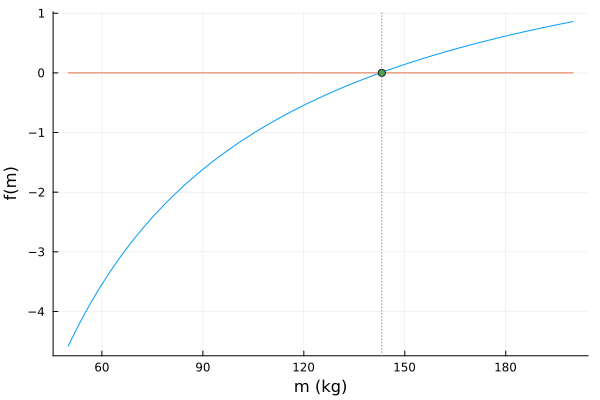

In [25]:
using Plots
m = collect(50.:1.:200.); # mass in kg
plot(m, [f.(m), zeros(size(m))], xlabel="m (kg)", ylabel="f(m)", legend=false) # Plot implicit equation and y=0 line
plot!([msol],[0.], seriestype=:scatter) # Plot single marker with solution of bisection method
vline!([msol], ls=:dot) # Vertical line passing through solution 